## **Student Identity**
| Name | Student Number | Major |
|:---|:---|:---|
| Aditya Anandita Dharma Putra | 13219043 | Electrical Engineering |

This assignment can also be accessed via the following link:

https://github.com/adityanandita/Business-Analytics-Course/blob/main/exercise_lecture_5.ipynb

# **Exercise 5 | Multivariate Analysis**

---

In [1]:
# Import Library
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

# Read cp_data_eng_trial2.csv file as data
data = pd.read_csv('cp_data_eng_trial2.csv')

# **Exploratory Data Analysis**

In [2]:
# Show 10 data first
data.head(10)

,NO,Customer_ID,Response,Sex,Age,Job,questionnaire1,questionnaire2,questionnaire3,questionnaire4,questionnaire5,avg_charge,charge_avg_per_mon,charge_Monday,contraction_day,contraction_day_JP
0,1,80000018,no reply,F,35.0,NaN,0.0,0.0,0.0,0.0,0.0,28656.0,28656.0,NaN,7.0,Saturday
1,2,80000042,reply,M,39.0,general payer1,0.0,0.0,0.0,0.0,0.0,22815.0,29660.0,29320.0,3.0,Tuesday
2,3,80000234,no reply,F,43.0,NaN,0.0,0.0,0.0,0.0,0.0,11912.0,11912.0,13920.0,1.0,Sunday
3,4,80000273,no reply,F,45.0,NaN,0.0,0.0,0.0,0.0,0.0,3860.0,3860.0,NaN,4.0,Wednesday
4,5,80000529,no reply,M,33.0,general payer1,0.0,0.0,0.0,0.0,0.0,9483.0,9483.0,NaN,1.0,Sunday
5,6,80000627,no reply,M,38.0,general payer1,0.0,0.0,0.0,0.0,0.0,27896.0,34870.0,NaN,3.0,Tuesday
6,7,80000646,reply,M,38.0,general payer1,0.0,0.0,0.0,0.0,0.0,28581.0,28581.0,NaN,2.0,Monday
7,8,80000806,no reply,F,33.0,NaN,0.0,0.0,0.0,0.0,0.0,17200.0,17200.0,22490.0,1.0,Sunday
8,9,80000966,no reply,F,26.0,general payer1,0.0,0.0,0.0,0.0,0.0,28854.0,28854.0,NaN,5.0,Thursday
9,10,80000985,no reply,M,50.0,doctor,0.0,0.0,0.0,0.0,0.0,63710.0,63710.0,NaN,2.0,Monday


In [3]:
# To make our data more informative, I'll try to mapping the Sex column like this:
sex_mapping = {'F': 'Female', 'M': 'Male'}
data['Sex'] = data['Sex'].map(sex_mapping)


In [4]:
# Then, we will see 10 data first again to make sure is it clear or not
data.head(10)

,NO,Customer_ID,Response,Sex,Age,Job,questionnaire1,questionnaire2,questionnaire3,questionnaire4,questionnaire5,avg_charge,charge_avg_per_mon,charge_Monday,contraction_day,contraction_day_JP
0,1,80000018,no reply,Female,35.0,NaN,0.0,0.0,0.0,0.0,0.0,28656.0,28656.0,NaN,7.0,Saturday
1,2,80000042,reply,Male,39.0,general payer1,0.0,0.0,0.0,0.0,0.0,22815.0,29660.0,29320.0,3.0,Tuesday
2,3,80000234,no reply,Female,43.0,NaN,0.0,0.0,0.0,0.0,0.0,11912.0,11912.0,13920.0,1.0,Sunday
3,4,80000273,no reply,Female,45.0,NaN,0.0,0.0,0.0,0.0,0.0,3860.0,3860.0,NaN,4.0,Wednesday
4,5,80000529,no reply,Male,33.0,general payer1,0.0,0.0,0.0,0.0,0.0,9483.0,9483.0,NaN,1.0,Sunday
5,6,80000627,no reply,Male,38.0,general payer1,0.0,0.0,0.0,0.0,0.0,27896.0,34870.0,NaN,3.0,Tuesday
6,7,80000646,reply,Male,38.0,general payer1,0.0,0.0,0.0,0.0,0.0,28581.0,28581.0,NaN,2.0,Monday
7,8,80000806,no reply,Female,33.0,NaN,0.0,0.0,0.0,0.0,0.0,17200.0,17200.0,22490.0,1.0,Sunday
8,9,80000966,no reply,Female,26.0,general payer1,0.0,0.0,0.0,0.0,0.0,28854.0,28854.0,NaN,5.0,Thursday
9,10,80000985,no reply,Male,50.0,doctor,0.0,0.0,0.0,0.0,0.0,63710.0,63710.0,NaN,2.0,Monday


In [5]:
# Then, we will try to know the dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1293 entries, 0 to 1292
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   NO                  1293 non-null   int64  
 1   Customer_ID         1293 non-null   int64  
 2   Response            1003 non-null   object 
 3   Sex                 1232 non-null   object 
 4   Age                 1232 non-null   float64
 5   Job                 771 non-null    object 
 6   questionnaire1      1095 non-null   float64
 7   questionnaire2      1095 non-null   float64
 8   questionnaire3      1095 non-null   float64
 9   questionnaire4      1095 non-null   float64
 10  questionnaire5      1095 non-null   float64
 11  avg_charge          1033 non-null   float64
 12  charge_avg_per_mon  1033 non-null   float64
 13  charge_Monday       567 non-null    float64
 14  contraction_day     1086 non-null   float64
 15  contraction_day_JP  1086 non-null   object 
dtypes: flo

In [6]:
def analysis_null_vale_table(table):
    null_value = table.isnull().sum()
    percentage_null_value = round(100*null_value/len(table),2)
    return pd.concat([null_value,percentage_null_value], axis=1).rename(columns={0:"Missing Count", 1:"Percentage (%)"})

In [7]:
analysis_null_vale_table(data)

,Missing Count,Percentage (%)
NO,0,0.00
Customer_ID,0,0.00
Response,290,22.43
Sex,61,4.72
Age,61,4.72
Job,522,40.37
questionnaire1,198,15.31
questionnaire2,198,15.31
questionnaire3,198,15.31
questionnaire4,198,15.31


<Axes: >

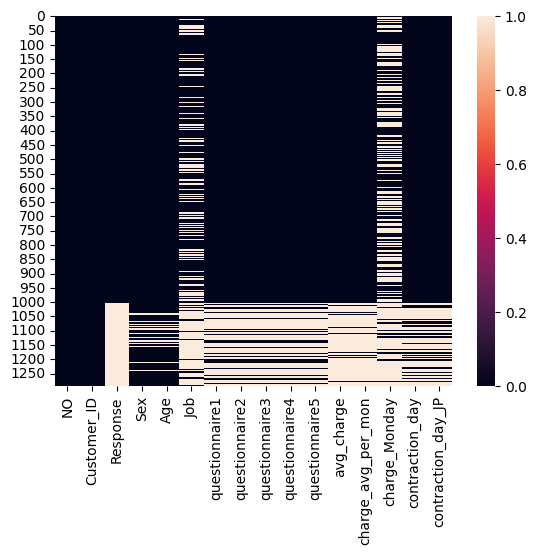

In [8]:
sns.heatmap(data.isna())

Based on the information and the heatmap above, we know that there are some data is not full and still have some gap for some columns. It will make our analysis will not accurate perfectly. So, to tackle this problem, we must do data cleaning and data cleansing first.

# **Data Cleaning**

In [9]:
data.columns

Index(['NO', 'Customer_ID', 'Response', 'Sex', 'Age', 'Job', 'questionnaire1',
       'questionnaire2', 'questionnaire3', 'questionnaire4', 'questionnaire5',
       'avg_charge', 'charge_avg_per_mon', 'charge_Monday', 'contraction_day',
       'contraction_day_JP'],
      dtype='object')

In [10]:
# Assume the No and Cust. ID are must.
check_column = data.columns.difference(['NO', 'Customer_ID'])
empty_column = data[check_column].isnull().all(axis=1)
print(data[empty_column]['Customer_ID'])
print(f'\nTotal data incompleted: {len(data[empty_column])}')

1007    70100004
1011    70100008
1031    70100028
1040    70100037
1056    70100053
1062    70100059
1072    70100069
1078    70100075
1092    70100089
1094    70100091
1104    70100101
1111    70100108
1119    70100116
1125    70100122
1151    70100148
1153    70100150
1155    70100152
1181    70100178
1224    70100221
1230    70100227
1239    70100236
1262    70100259
1268    70100265
1280    70100277
1286    70100283
Name: Customer_ID, dtype: int64

Total data incompleted: 25


We know there are 25 accounts where the data is not completed. So We will delete this data from our dataframe.

In [11]:
data_clean = data[~empty_column]

In [12]:
# Then to tackle NaN value in job, we use this method:
data_clean['Job'] = data_clean['Job'].fillna('No Answer')

# To tackle there are no response, we use same method like Job
data_clean['Response'] = data_clean['Response'].fillna('No Answer')

C:\Users\user\AppData\Local\Temp\ipykernel_27388\4026267894.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Job'] = data_clean['Job'].fillna('No Answer')
C:\Users\user\AppData\Local\Temp\ipykernel_27388\4026267894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Response'] = data_clean['Response'].fillna('No Answer')


<Axes: >

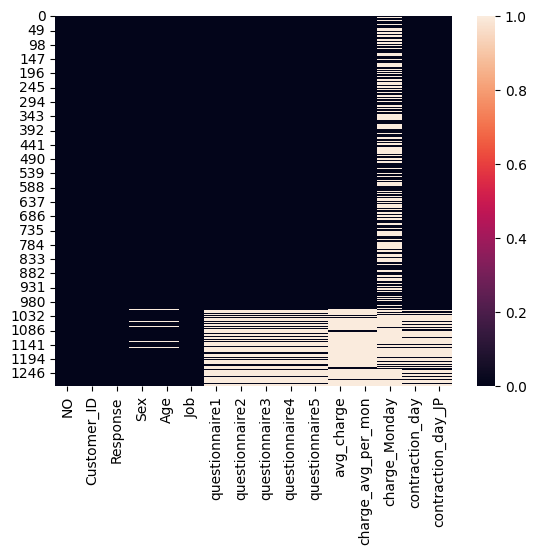

In [13]:
sns.heatmap(data_clean.isna())

In [14]:
# calculate number of nan or infs in a dataframe
def count_missing(data):
    missing = data.isnull().sum()
    missing = missing[missing > 0]
    missing.sort_values(inplace=True)
    return missing

print("Missing values in data_clean:")
count_missing(data_clean)

Missing values in data_clean:


Sex                    36
Age                    36
questionnaire1        173
questionnaire2        173
questionnaire3        173
questionnaire4        173
questionnaire5        173
contraction_day       182
contraction_day_JP    182
avg_charge            235
charge_avg_per_mon    235
charge_Monday         701
dtype: int64

Based on the data above, we know that there is empty data for each feature. In this case, we will focus on data cleaning for the features `charge_avg_per_mon` and `avg_charge`.

In [15]:
# Split the data into two parts where the first is the data that has no missing value on "charge_avg_per_mon" and "avg_charge", the second is the data that has missing value
data_clean_no_missing = data_clean.dropna(subset=['charge_avg_per_mon', 'avg_charge'])
data_clean_missing = data_clean[~data_clean.index.isin(data_clean_no_missing.index)]

Text(0.5, 1.0, 'Missing Value: 235')

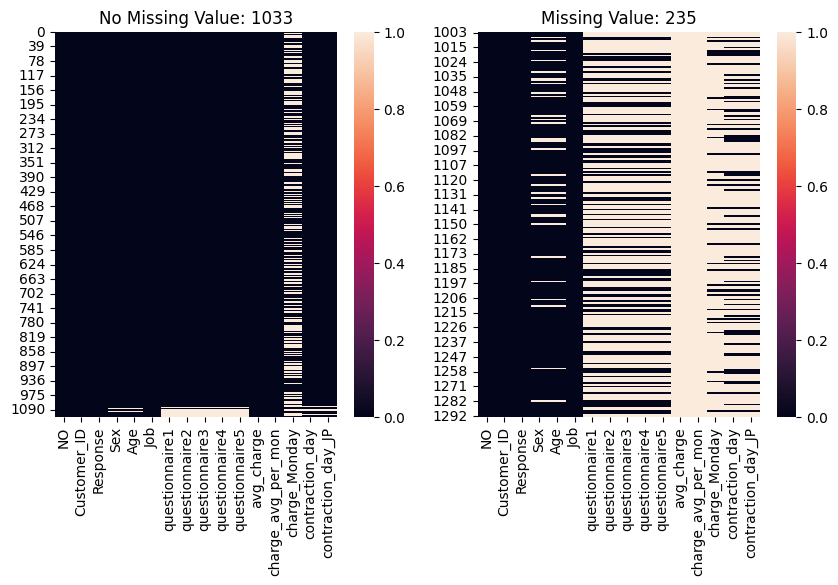

In [16]:
# Make the heatmap of the data that has no missing value on "charge_avg_per_mon" and "avg_charge" and the data that has missing value
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.heatmap(data_clean_no_missing.isna(), ax=ax[0])
# add the count of data at the title of each heatmap
ax[0].set_title('No Missing Value: ' + str(len(data_clean_no_missing)))
sns.heatmap(data_clean_missing.isna(), ax=ax[1])
ax[1].set_title('Missing Value: ' + str(len(data_clean_missing)))

There are 1033 clean data where the data for the columns `charge_avg_per_mon` and `avg_charge` are completely filled, while the number of data with missing values for this feature is 235.

# **Decision Tree Analysis**

In [42]:
df = data_clean_no_missing
df.head(10)

,NO,Customer_ID,Response,Sex,Age,Job,questionnaire1,questionnaire2,questionnaire3,questionnaire4,questionnaire5,avg_charge,charge_avg_per_mon,charge_Monday,contraction_day,contraction_day_JP
0,1,80000018,no reply,Female,35.0,No Answer,0.0,0.0,0.0,0.0,0.0,28656.0,28656.0,NaN,7.0,Saturday
1,2,80000042,reply,Male,39.0,General Payer,0.0,0.0,0.0,0.0,0.0,22815.0,29660.0,29320.0,3.0,Tuesday
2,3,80000234,no reply,Female,43.0,No Answer,0.0,0.0,0.0,0.0,0.0,11912.0,11912.0,13920.0,1.0,Sunday
3,4,80000273,no reply,Female,45.0,No Answer,0.0,0.0,0.0,0.0,0.0,3860.0,3860.0,NaN,4.0,Wednesday
4,5,80000529,no reply,Male,33.0,General Payer,0.0,0.0,0.0,0.0,0.0,9483.0,9483.0,NaN,1.0,Sunday
5,6,80000627,no reply,Male,38.0,General Payer,0.0,0.0,0.0,0.0,0.0,27896.0,34870.0,NaN,3.0,Tuesday
6,7,80000646,reply,Male,38.0,General Payer,0.0,0.0,0.0,0.0,0.0,28581.0,28581.0,NaN,2.0,Monday
7,8,80000806,no reply,Female,33.0,No Answer,0.0,0.0,0.0,0.0,0.0,17200.0,17200.0,22490.0,1.0,Sunday
8,9,80000966,no reply,Female,26.0,General Payer,0.0,0.0,0.0,0.0,0.0,28854.0,28854.0,NaN,5.0,Thursday
9,10,80000985,no reply,Male,50.0,doctor,0.0,0.0,0.0,0.0,0.0,63710.0,63710.0,NaN,2.0,Monday


In [43]:
# Assuming 'General Payer' categories are in a column named 'General_Payer'
# We'll replace all 'General Payer 2' and 'General Payer 3' with 'General Payer 1'
df['Job'] = df['Job'].replace(['general payer1', 'general payer2', 'general payer3'], 'General Payer')

C:\Users\user\AppData\Local\Temp\ipykernel_27388\1939044635.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Job'] = df['Job'].replace(['general payer1', 'general payer2', 'general payer3'], 'General Payer')


In [44]:
# Assuming the typo is in the 'Age' column and the correct maximum age should be 120
df['Age'] = df['Age'].apply(lambda x: x/10 if x > 120 else x)

C:\Users\user\AppData\Local\Temp\ipykernel_27388\1777761416.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df['Age'].apply(lambda x: x/10 if x > 120 else x)


In [45]:
# One-hot encoding for 'Sex' Column
df = pd.get_dummies(df, columns=['Sex'])

# Then, use Label Encoding for Job and drop contraction_day_JP column because it's same with contraction_day feature
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Job'] = le.fit_transform(df['Job'])

df = df.drop('contraction_day_JP', axis=1)

In [30]:
df

,NO,Customer_ID,Response,Age,Job,questionnaire1,questionnaire2,questionnaire3,questionnaire4,questionnaire5,avg_charge,charge_avg_per_mon,charge_Monday,contraction_day,contraction_day_JP,Sex_Female,Sex_Male
0,1,80000018,no reply,35.0,1,0.0,0.0,0.0,0.0,0.0,28656.0,28656.0,NaN,7.0,Saturday,True,False
1,2,80000042,reply,39.0,0,0.0,0.0,0.0,0.0,0.0,22815.0,29660.0,29320.0,3.0,Tuesday,False,True
2,3,80000234,no reply,43.0,1,0.0,0.0,0.0,0.0,0.0,11912.0,11912.0,13920.0,1.0,Sunday,True,False
3,4,80000273,no reply,45.0,1,0.0,0.0,0.0,0.0,0.0,3860.0,3860.0,NaN,4.0,Wednesday,True,False
4,5,80000529,no reply,33.0,0,0.0,0.0,0.0,0.0,0.0,9483.0,9483.0,NaN,1.0,Sunday,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251,1251,70100248,No Answer,40.0,6,0.0,0.0,0.0,0.0,0.0,70709.0,70709.0,NaN,NaN,NaN,False,True
1255,1255,70100252,No Answer,36.0,0,NaN,NaN,NaN,NaN,NaN,17963.0,17963.0,NaN,7.0,Saturday,False,True
1261,1261,70100258,No Answer,43.0,1,NaN,NaN,NaN,NaN,NaN,8200.0,8200.0,NaN,3.0,Tuesday,True,False
1269,1269,70100266,No Answer,39.0,1,NaN,NaN,NaN,NaN,NaN,33061.0,33061.0,98650.0,1.0,Sunday,True,False


Accuracy: 92.903%


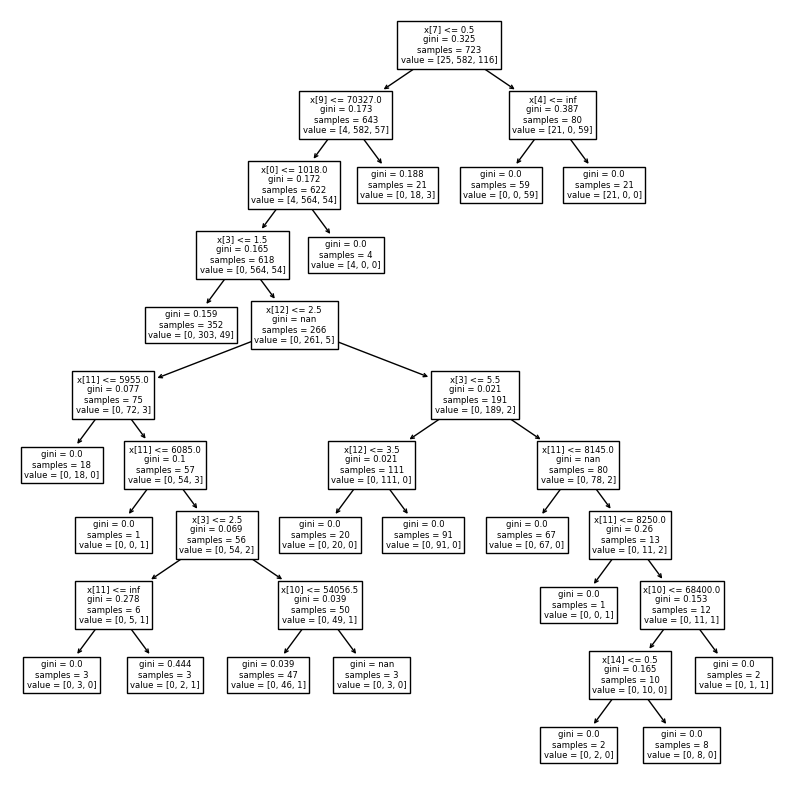

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

# Selecting relevant features and response variable
features = df.drop('Response', axis=1)
response = df['Response']

# Splitting the dataset into training and testing sets
features_train, features_test, response_train, response_test = train_test_split(features, response, test_size=0.3, random_state=42)

# Initializing the Decision Tree Classifier
classifier = DecisionTreeClassifier()

# Fitting the model with the training data
classifier.fit(features_train, response_train)

# Making predictions on the test data
predictions = classifier.predict(features_test)

# Evaluating the model
accuracy = accuracy_score(response_test, predictions)
print(f'Accuracy: {accuracy*100:.3f}%')

plt.figure(figsize=(10, 10))

# Set the DPI to make the image clearer
plt.savefig('decision_tree.png', dpi=300)

# Visualizing the decision tree
tree.plot_tree(classifier)

# Show the plot
plt.show()

In [55]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Calculating metrics
accuracy = accuracy_score(response_test, predictions)
precision = precision_score(response_test, predictions, average='weighted')
recall = recall_score(response_test, predictions, average='weighted')
f1 = f1_score(response_test, predictions, average='weighted')

# Printing the metrics
print(f'Accuracy : {accuracy*100:.3f}%')
print(f'Precision: {precision*100:.3f}%')
print(f'Recall   : {recall*100:.3f}%')
print(f'F1 Score : {f1*100:.3f}%')

# Detailed classification report
print('\nClassification Report:\n', classification_report(response_test, predictions))

Accuracy : 92.903%
Precision: 92.777%
Recall   : 92.903%
F1 Score : 92.233%

Classification Report:
               precision    recall  f1-score   support

   No Answer       1.00      0.60      0.75         5
    no reply       0.93      0.99      0.96       261
       reply       0.90      0.59      0.71        44

    accuracy                           0.93       310
   macro avg       0.94      0.73      0.81       310
weighted avg       0.93      0.93      0.92       310



## **Analysis of the Decision Tree**

Analyzing the decision tree and summarizing the results involves looking at the structure of the tree, the decisions made at each node, and the overall accuracy of the model. Here’s a detailed analysis:
| No. | Component | Analysis |
|--|--|--|
|1.|**Performance**| All metric > 92% indicates that the model is performing well on the dataset.|
|2.|**Root Node**| The root node is where the first decision is made. The feature used for this split is the most important one as it provides the highest information gain.
|3.|**Branches and Nodes**| Each branch represents a decision path, and each node represents a condition based on which the tree makes a decision. The conditions are typically in the form of feature thresholds.|
|4.|**Leaf Nodes**| These are the final nodes that represent the predicted outcome. The purity of these nodes, indicated by the Gini impurity, should ideally be low, signifying high confidence in the prediction.|
|5.|**Gini Impurity**| This metric shows the mix of classes at each node. Nodes with lower Gini impurity are better as they indicate a more homogeneous set of samples.|
|6.|**Sample Size**| Nodes with a larger number of samples are more robust and their decisions are based on more evidence. Smaller nodes might be less reliable and could be a sign of overfitting.|
|7.|**Feature Importance**| Features that appear higher up in the tree (closer to the root) and more frequently are generally more important for prediction.|
|8.|**Pruning**| If the tree is very deep, it might be overfitting to the training data. Pruning techniques can be applied to simplify the model and potentially improve its generalizability.|
|9.|**Decision Paths**| Each path from the root to a leaf represents a decision rule. Analyzing these paths can give insights into the conditions that lead to a particular prediction.|
|10.|**Model Interpretability**| Decision trees are highly interpretable. You can trace the decision-making process and understand the logic behind each prediction.|